Comecemos por baixar o dataset

In [1]:
import pandas as pd
df = pd.read_csv("dataset.csv")

Analizar o dataset

In [2]:
df.sample(4)

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria,custo
1459,masculino,viuvo,urbana,37.3,nao,idoso,5602.2
1027,masculino,casado,suburbana,38.6,nao,adulto_jovem,8179.9
530,feminino,casado,urbana,32.9,nao,adulto_jovem,2645.1
241,feminino,casado,urbana,27.8,nao,adulto_meia_idade,3081.6


In [3]:
df.shape

(2215, 7)

In [4]:
df.describe() #Já é possivel imaginar possiveis outliers

,imc,custo
count,2215.000000,2215.000000
mean,30.704199,6045.710971
std,6.425918,8354.316703
min,3.400000,487.200000
25%,26.150000,2042.200000
50%,30.400000,4050.700000
75%,34.700000,7176.300000
max,83.100000,180544.400000


Verificar a existencia de valores nulos ou valores duplicados

In [5]:
print(df.isnull().sum()) #  Verificar valores nulos
print("Quantidade de valores duplicados: ",df.duplicated().sum())

genero             0
estado_civil       0
zona_residencia    0
imc                0
fumador            0
class_etaria       0
custo              0
dtype: int64
Quantidade de valores duplicados:  1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

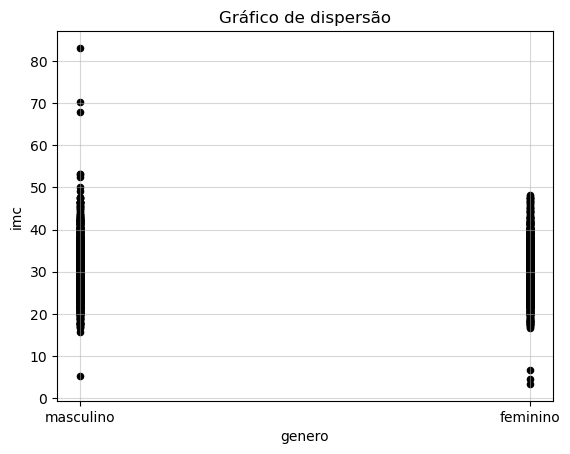

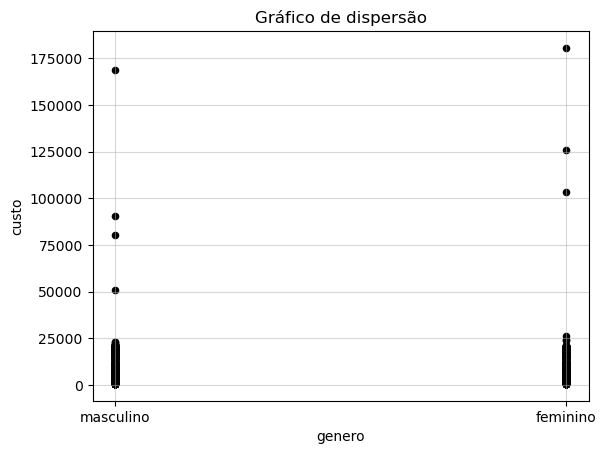

In [7]:
df.plot(x='genero', y='imc', kind='scatter', c='black')
plt.title("Gráfico de dispersão")
plt.xlabel("genero")
plt.ylabel("imc")
plt.grid(True, alpha=0.5)
plt.show()

df.plot(x='genero', y='custo', kind='scatter', c='black')
plt.title("Gráfico de dispersão")
plt.xlabel("genero")
plt.ylabel("custo")
plt.grid(True, alpha=0.5)
plt.show()

Ja podemos contar uns 7 outliers(Obvios) em IMC. E em custo uns 7 outliers(Obvios)

Mas vamos usar o boxplot para ver melhor

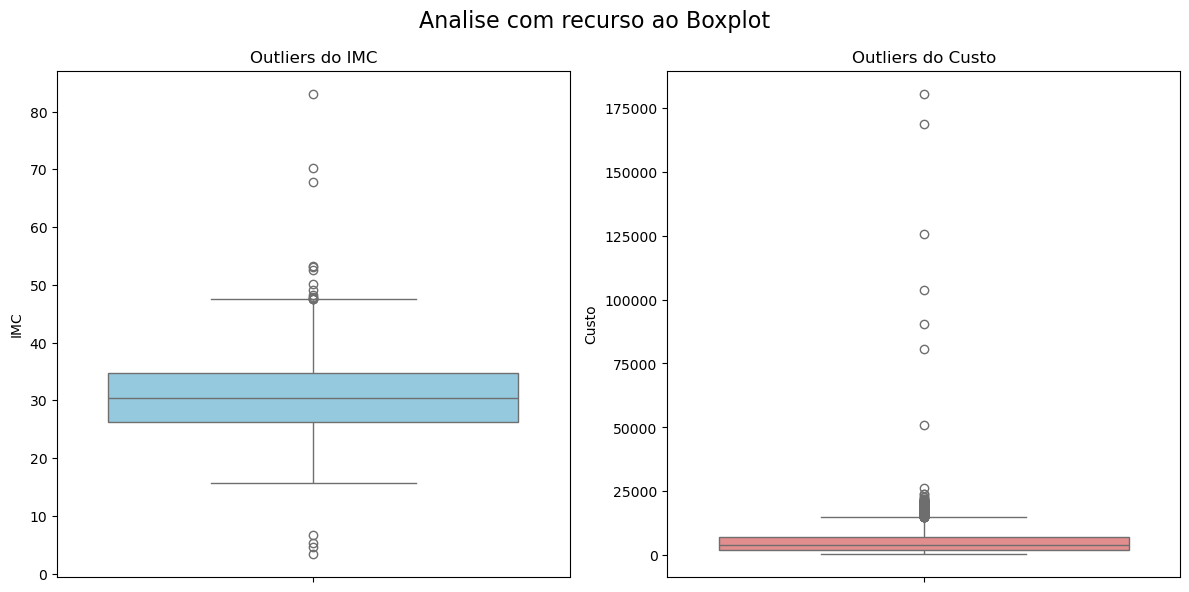

In [8]:
plt.figure(figsize=(12, 6))
plt.suptitle("Analise com recurso ao Boxplot",fontsize=16)

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='imc', color='skyblue')
plt.title('Outliers do IMC')
plt.ylabel('IMC')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='custo', color='lightcoral')
plt.title('Outliers do Custo')
plt.ylabel('Custo')

plt.tight_layout()
plt.show()

Recorrendo a histogramas

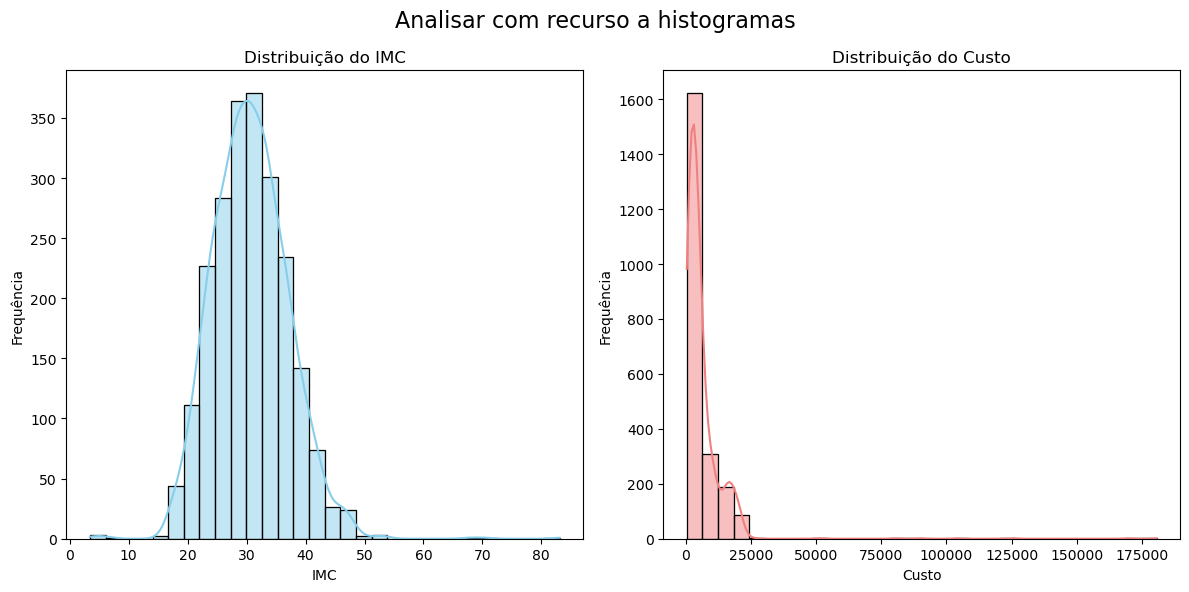

In [9]:
plt.figure(figsize=(12, 6))
plt.suptitle("Analisar com recurso a histogramas",fontsize=16)

plt.subplot(1, 2, 1)
sns.histplot(df['imc'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['custo'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuição do Custo')
plt.xlabel('Custo')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Agora que ja analisamos o nosso dataset com recurso a graficos, ficou claro que teremos de tratar os valores extremos(outliers).

Pré-processamento

Será coincidência ter 2 pessoas com as features e target iguais ? pelo sim e pelo não, iremos eliminar

In [10]:
df.isnull() # Eliminar valores nulos
df.drop_duplicates(keep='first',inplace=True) #Eliminar valores duplicados caso existam

Agora devemos tratar os Outliers do IMC. Utilizaremos o metodo Tukey Fences.

In [11]:
Q1_imc = df['imc'].quantile(0.25)
Q3_imc = df['imc'].quantile(0.75)

IQR_imc = Q3_imc - Q1_imc

fator_2_2 = 2.2  

limite_inferior = Q1_imc - fator_2_2 * IQR_imc
limite_superior = Q3_imc + fator_2_2 * IQR_imc

print("Limite inferior (1.5 * IQR) para 'imc': ", limite_inferior)
print("Limite superior (1.5 * IQR) para 'imc': ", limite_superior)

Limite inferior (1.5 * IQR) para 'imc':  7.259999999999991
Limite superior (1.5 * IQR) para 'imc':  53.56500000000001


Valores superiores ao limite superior serão considerados outliers e eliminados. Da mesma forma, valores inferiores ao limite inferior também serão considerados outliers e removidos.

In [12]:
outliers_imc = df[(df['imc'] < limite_inferior) | (df['imc'] > limite_superior)]

print("Quantidade de outliers no 'imc' a eliminar: ",outliers_imc.shape[0])
print(outliers_imc[['imc']]) 

Quantidade de outliers no 'imc' a eliminar:  7
       imc
320   67.8
355    4.6
727   83.1
1059   5.3
1494   6.7
1773  70.3
1823   3.4


Proceder à eliminação dos outliers de imc

In [13]:
df = df[(df['imc'] >= limite_inferior) & (df['imc'] <= limite_superior)]

Pelo boxplot verificar a redução dos valores discrepantes, os outliers

<Axes: ylabel='imc'>

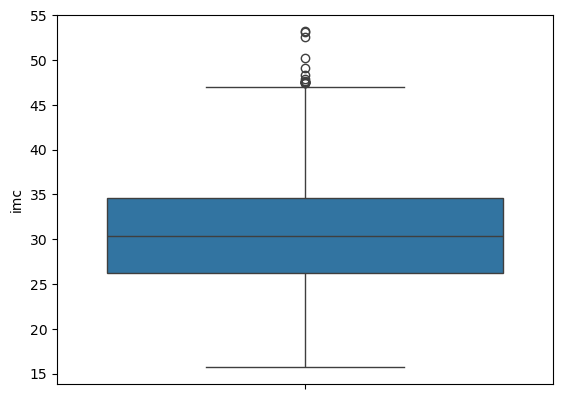

In [14]:
sns.boxplot(data=df['imc'])

Text(0, 0.5, 'Frequência')

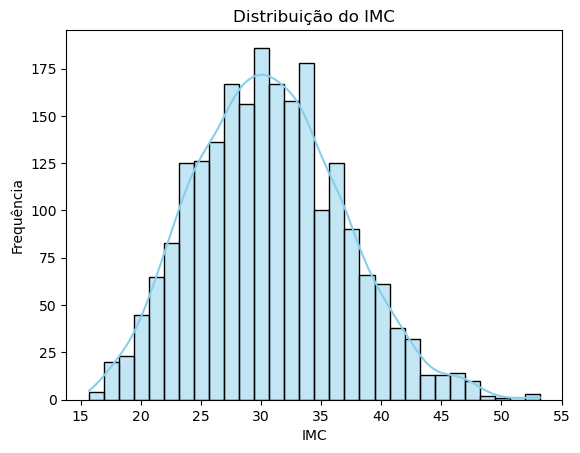

In [15]:
sns.histplot(df['imc'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')

In [16]:
df.shape

(2207, 7)

Iremos agora tratar dos outliers de custo

In [17]:
Q1 = df['custo'].quantile(0.25)
Q3 = df['custo'].quantile(0.75)

IQR = Q3 - Q1

fator_3_3 = 3.3 # Não iremos usar o 1.5 pois eliminava demasiados dados. 3.3 foi o valorer que melhor equilibrou os resultados finais.

limite_inferior = Q1 - fator_3_3 * IQR
limite_superior = Q3 + fator_3_3 * IQR

limite_inferior=0
print("Limite inferior (1.5 * IQR): ", limite_inferior) # nao faz sentido ser negativo, por isso ajustamos para zero.
print("Limite superior (1.5 * IQR): ", limite_superior)

Limite inferior (1.5 * IQR):  0
Limite superior (1.5 * IQR):  24169.050000000003


In [18]:
outliers_custo = df[(df['custo'] < limite_inferior) | (df['custo'] > limite_superior)]

print("Quantidade de outliers em 'custo' a ser eliminada: ",outliers_custo.shape[0])
print(outliers_custo[['custo']])

Quantidade de outliers em 'custo' a ser eliminada:  8
         custo
745    26239.5
993   168788.6
1120   50839.8
1307  103539.5
1667   90396.4
1862   80516.1
1973  180544.4
2049  125590.2


Proceder à eliminação dos outliers de custo

In [19]:
df = df[(df['custo'] >= limite_inferior) & (df['custo'] <= limite_superior)]

Verificar os novos valores nos extremos

In [20]:
df_ordenado_asc = df.sort_values(by='custo', ascending=False)
df_ordenado_des = df.sort_values(by='custo', ascending=True)
print(df_ordenado_asc['custo'].head(4)) # Novos valores mais altos
print(df_ordenado_des['custo'].head(4)) # Novos valores mais baixos

128     23793.1
869     23792.8
1058    22698.0
433     22694.3
Name: custo, dtype: float64
1842    487.2
215     487.3
2196    487.5
877     490.1
Name: custo, dtype: float64


Pelo boxplot verificar a redução dos valores discrepantes, os outliers

<Axes: ylabel='custo'>

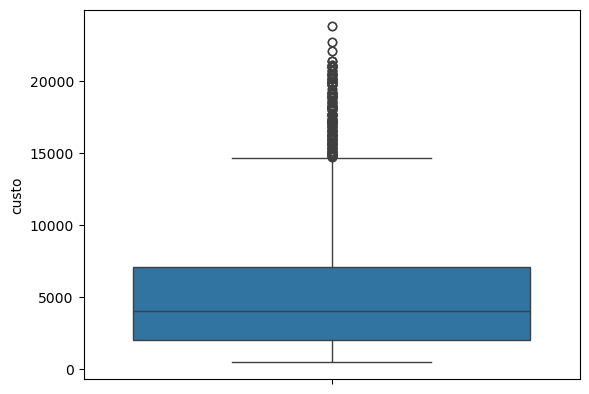

In [21]:
sns.boxplot(data=df['custo'])

Text(0, 0.5, 'Frequência')

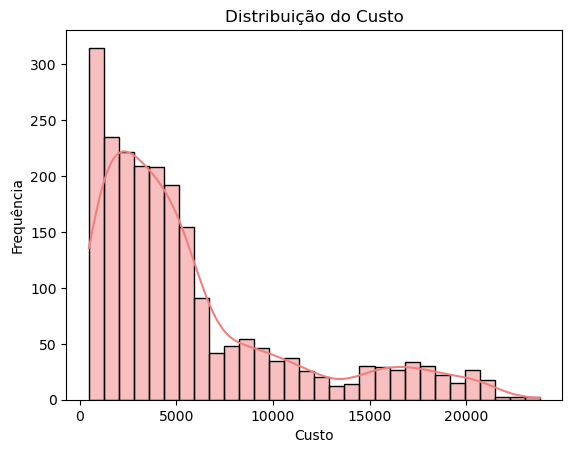

In [22]:
sns.histplot(df['custo'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuição do Custo')
plt.xlabel('Custo')
plt.ylabel('Frequência')

In [23]:
df.shape

(2199, 7)

Com a eliminaçao de alguns valores muito extremos e 1 row repetida o dataset perdeu 16 linhas, cerca de 0,72%

Como o dataset contém variáveis categóricas, é necessário converter-las para o formato numérico. Para isso, as variáveis binárias/booleanas serão mapeadas para 0 e 1, enquanto as demais variáveis categóricas será aplicada a técnica de One-Hot Encoding.

In [24]:
df['genero'] = df['genero'].map({'masculino': 1, 'feminino': 0})
df['fumador'] = df['fumador'].map({'sim': 1, 'nao': 0})

In [25]:
print(df['estado_civil'].unique())
print(df['zona_residencia'].unique())
print(df['class_etaria'].unique())

['casado' 'separado' 'solteiro' 'viuvo']
['suburbana' 'urbana' 'rural']
['adulto_meia_idade' 'adulto_senior' 'jovem' 'idoso' 'adolescente'
 'adulto_jovem']


In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder(sparse_output=False,drop='first') #Deixa no formato matriz
ohe = encoder.fit_transform(df[['estado_civil','zona_residencia','class_etaria']])
print(ohe[0]) #Espera-se na saida 4-1(estado_civil) + 3-1(zona_residencia) + 6-1(class_etaria) = 10 valores, pois eliminanos 1 varivel para evitar redundância.

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]


Eliminar as colunas que iremos substituir pelas colunas do onehotencoder

In [27]:
df.drop(['estado_civil', 'zona_residencia', 'class_etaria'], axis=1, inplace=True) #Eliminar as colunas

In [28]:
df

,genero,imc,fumador,custo
0,1,35.8,1,18213.9
1,0,39.3,0,4266.4
2,1,40.7,0,854.6
3,1,28.2,1,10169.7
4,0,31.1,0,4151.5
...,...,...,...,...
2210,0,35.4,0,5283.3
2211,0,29.9,0,4867.4
2212,0,26.1,0,2261.2
2213,0,27.7,0,1536.3


In [29]:
X = df.drop('custo',axis=1) # Apenas Features 
X = np.c_[X, ohe] # Junta as variaveis do OHE

y = df['custo'] # Apenas o target

In [30]:
X

array([[ 1. , 35.8,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. , 39.3,  0. , ...,  1. ,  0. ,  0. ],
       [ 1. , 40.7,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. , 26.1,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , 27.7,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. , 28.7,  0. , ...,  1. ,  0. ,  0. ]])

Antes de Normalizar

In [31]:
from sklearn.model_selection import train_test_split
Xtreino,Xteste,ytreino,yteste = train_test_split(X,y,test_size=0.2,random_state=5)

In [32]:
Xtreino

array([[ 0. , 39.3,  0. , ...,  0. ,  1. ,  0. ],
       [ 1. , 36. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. , 36.2,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. , 44.4,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. , 30.2,  1. , ...,  0. ,  0. ,  0. ]])

In [33]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(Xtreino,ytreino)
modelo.score(Xteste,yteste) #Metrica R2

-0.0704299120052283

Resultado esperado, como estamos a utilizar um modelo, baseado em SVMs, devemos sempre normalizar os dados, pois os SVMs são sensíveis à escala das variáveis. 

A normalização garante que todas as features tenham a mesma importância durante o treinamento, evitando que variáveis com maiores magnitudes dominem o processo de aprendizado.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()  # Escalador para X (variáveis independentes, Features)
scaler_y = StandardScaler()  # Escalador para y (variável dependente, Target)

#Para os dados de Treino
Xtreino_normalizado = scaler_X.fit_transform(Xtreino)
ytreino_normalizado = scaler_y.fit_transform(ytreino.values.reshape(-1, 1))

#Para os dados de Teste
Xteste_normalizado = scaler_X.transform(Xteste)
yteste_normalizado = scaler_y.transform(yteste.values.reshape(-1, 1))

In [35]:
Xtreino_normalizado[0] #Verificamos que os dados estao normalizados, seguindo o StanderScaler

array([-1.00056867,  1.39584407, -0.50815946, -0.45527489,  1.29668903,
       -0.32173463,  1.60022772, -0.93662579, -0.52405885, -0.66201704,
       -0.46705893,  3.31149308, -0.36018977])

In [36]:
modelo = SVR()
modelo.fit(Xtreino_normalizado, ytreino_normalizado.ravel())
modelo.score(Xteste_normalizado, yteste_normalizado) #Agora com os dados normalizados.

0.8596039027172833

Já vemos melhorias muito muito significativas. Tentaremos melhorar o modelo ajustando os hiperparametros(Tunning)

Para isso usamos o GridSearchCV, que após muitos testes, apresentou melhores resultados do que o RandomizedSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grelha={'C':[4,3,2,1],'gamma':['auto','scale'],'kernel':['rbf','linear']}

In [39]:
#Outra grelha(mais exaustiva e muito mais demorada) testada mas sem apresentar resultados melhores
#grelha={'C':[10, 5, 3, 1, 0.1, 0.01], 'gamma':['auto', 'scale', 0.05, 0.1, 0.2, 1, 3, 5], 'kernel':['rbf', 'linear', 'sigmoid'],
 #       'epsilon':[0.001, 0.01, 0.1, 0.5], 'coef0':[0, 0.1, 0.5, 1]}

In [40]:
procura_modelo = GridSearchCV(modelo, param_grid=grelha,cv=10) #Validaçao cruzada(CV-CrossValidation)

In [41]:
procura_modelo.fit(Xtreino_normalizado,ytreino_normalizado.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [4, 3, 2, 1], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear']})

In [42]:
procura_modelo.best_params_

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [43]:
modelo_otimo=procura_modelo.best_estimator_

In [44]:
modelo_otimo.score(Xteste_normalizado,yteste_normalizado)

0.8652088733698249

Agora que temos o modelo otimo, vamos fazer algumas previsões

In [45]:
previsao = modelo_otimo.predict(Xteste_normalizado)

In [46]:
y0_prev = scaler_y.inverse_transform(previsao.reshape(-1, 1)) #Desnormalizar o custo

Verificar alguns resultados

In [47]:
for i in range (1,6):
    print("Real: ", yteste.iloc[i])
    print("previsto: ",y0_prev[i])
    print("***********Diferença: ", (yteste.iloc[i]-y0_prev[i]))

Real:  3867.6
previsto:  [3811.33024243]
***********Diferença:  [56.26975757]
Real:  10345.5
previsto:  [9959.18193837]
***********Diferença:  [386.31806163]
Real:  938.6
previsto:  [1348.63446152]
***********Diferença:  [-410.03446152]
Real:  3928.4
previsto:  [3799.20022543]
***********Diferença:  [129.19977457]
Real:  1661.2
previsto:  [2025.54958141]
***********Diferença:  [-364.34958141]


Verificar as caraterísticas que mais influência têm nas despesas de saúde de um cliente. 

In [48]:
from sklearn.inspection import permutation_importance


Importância das características:
              feature  importancia
2             fumador     1.104683
1                 imc     0.194292
11              idoso     0.102740
10      adulto_senior     0.094981
4            solteiro     0.053720
9   adulto_meia_idade     0.023142
3            separado     0.018889
5               viuvo     0.018095
12              jovem     0.014719
8        adulto_jovem     0.012360
6           suburbana     0.009960
0              genero     0.007371
7              urbana     0.004609


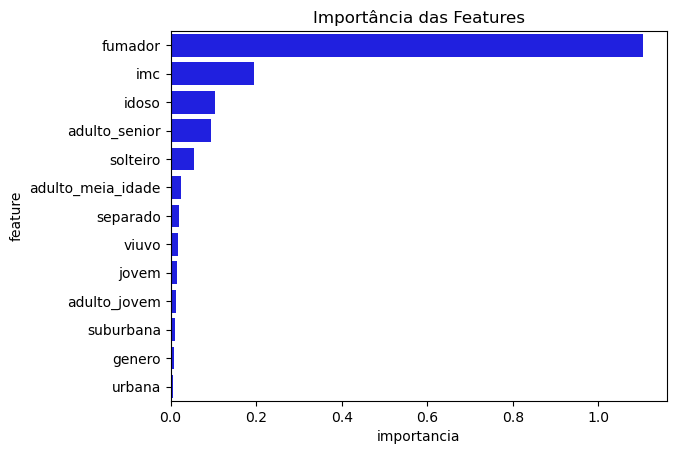

In [49]:
# Nome das colunas
coluna_estado_civil = encoder.categories_[0][1:] #Necessario pois apliquei no OHE a remoçao da primeira coluna
coluna_zona_residencia = encoder.categories_[1][1:]
coluna_class_etaria_cols = encoder.categories_[2][1:]

# Unir as colunas
novas_colunas = ['genero', 'imc', 'fumador'] + list(coluna_estado_civil) + list(coluna_zona_residencia) + list(coluna_class_etaria_cols)

# Criar o dataframe X_df para ter as colunas criadas
X_df = pd.DataFrame(X, columns=novas_colunas)

importancia = permutation_importance(modelo_otimo, Xteste_normalizado, yteste_normalizado,
                                          scoring='neg_mean_squared_error',n_repeats=10,random_state=2)

# Dataframe com os valores da importancia das caracteristicas
importancia_df = pd.DataFrame({
    'feature': X_df.columns,
    'importancia': importancia.importances_mean
})

importancia_ord = importancia_df.sort_values(by='importancia', ascending=False)

print("\nImportância das características:")
print(importancia_ord)
sns.barplot(x='importancia', y='feature', data=importancia_ord, color='blue')
plt.title("Importância das Features")
plt.show()

Por fim, prever os custos do ficheiro just_features e criar o ficheiro grupo#_custos_estimados.csv

In [50]:
df_just_features = pd.read_csv("just_features.csv")

In [51]:
df_just_features.head()

,genero,estado_civil,zona_residencia,imc,fumador,class_etaria
0,feminino,casado,suburbana,25.6,sim,adulto_meia_idade
1,feminino,casado,suburbana,23.1,sim,adulto_senior
2,masculino,solteiro,suburbana,26.3,nao,adolescente
3,feminino,solteiro,suburbana,27.0,nao,adolescente
4,feminino,casado,rural,32.6,nao,adulto_senior


In [52]:
df_just_features.describe()

,imc
count,550.000000
mean,30.788182
std,5.877773
min,17.100000
25%,26.400000
50%,30.550000
75%,35.100000
max,46.800000


Aplicar as mesmas transformações, utilizando as tecnicas usadas no ficheiro dataset.csv

In [53]:
df_just_features['genero'] = df_just_features['genero'].map({'masculino': 1, 'feminino': 0})
df_just_features['fumador'] = df_just_features['fumador'].map({'sim': 1, 'nao': 0})

encoder = OneHotEncoder(sparse_output=False,drop='first')  
ohe = encoder.fit_transform(df_just_features[['estado_civil', 'zona_residencia', 'class_etaria']])

df_just_features.drop(['estado_civil', 'zona_residencia', 'class_etaria'], axis=1, inplace=True)
df_just_features = np.c_[df_just_features, ohe]
df_just_features

#Normalização
X_normalizado = scaler_X.transform(df_just_features)
X_normalizado[8] #confirmar a normalizaçao 

array([ 0.99943166,  0.25971445, -0.50815946, -0.45527489, -0.77119493,
       -0.32173463, -0.62491106,  1.06766225, -0.52405885,  1.51053514,
       -0.46705893, -0.30197859, -0.36018977])

In [54]:
previsoes = modelo_otimo.predict(X_normalizado)

previsoes = scaler_y.inverse_transform(previsoes.reshape(-1, 1))

# Criar DataFrame com a coluna custo
df_previsoes = pd.DataFrame(previsoes, columns=['custo'])

df_previsoes

,custo
0,10585.162320
1,9577.889454
2,1167.951147
3,1161.421017
4,5847.289829
...,...
545,2855.460684
546,4903.951598
547,3124.337070
548,3593.425423


In [55]:
# Criar o ficheiro 
df_previsoes.to_csv("grupo59_custos_estimados.csv", index=False)